In [1]:
import pandas as pd
#import sqlalchemy
import psycopg2
import matplotlib.pyplot as plt
import pprint

from matplotlib import pyplot as plt
from sqlalchemy import create_engine

#save the figures
output_folder = "../"

In [2]:
# connect to your local database
engine = create_engine('postgresql://localhost:5432/Employees3_DB')
connection = engine.connect()

In [3]:
#1. Create a histogram to visualize the most common salary ranges for employees.
#2. Create a bar chart of average salary by title.
# UPLOAD: tables needed for visualizations, salaries, employees, titles
# Employees upload
employees_df = pd.read_sql('SELECT * FROM employees', connection, parse_dates=['birth_date', 'hire_date'])
employees_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [4]:
#check for missing values, 
employees_df.info()
#there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   emp_no        300024 non-null  int64         
 1   emp_title_id  300024 non-null  object        
 2   birth_date    300024 non-null  datetime64[ns]
 3   first_name    300024 non-null  object        
 4   last_name     300024 non-null  object        
 5   sex           300024 non-null  object        
 6   hire_date     300024 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 16.0+ MB


In [5]:
# Salaries upload
salaries_df = pd.read_sql('SELECT * FROM salaries', connection)
salaries_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [6]:
# titles upload
titles_df = pd.read_sql('SELECT * FROM titles', connection)
titles_df.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [7]:
# merged DataFrame of employee and title
employee_titles_df = employees_df.merge(titles_df, left_on='emp_title_id', right_on='title_id')
employee_titles_df.head()


,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,title_id,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,s0001,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,s0001,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,s0001,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,s0001,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,s0001,Staff


In [8]:
# merged DataFrame of employee_titles_df and salary
employee_titles_salaries_df = employee_titles_df.merge(salaries_df, on='emp_no')
employee_titles_salaries_df.head()


,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,title_id,title,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,s0001,Staff,40000
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,s0001,Staff,40000
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,s0001,Staff,56087
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,s0001,Staff,87084
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,s0001,Staff,63016


In [9]:
#same number of employess
len(employee_titles_salaries_df)


300024

In [10]:
#no missing information
employee_titles_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300024 entries, 0 to 300023
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   emp_no        300024 non-null  int64         
 1   emp_title_id  300024 non-null  object        
 2   birth_date    300024 non-null  datetime64[ns]
 3   first_name    300024 non-null  object        
 4   last_name     300024 non-null  object        
 5   sex           300024 non-null  object        
 6   hire_date     300024 non-null  datetime64[ns]
 7   title_id      300024 non-null  object        
 8   title         300024 non-null  object        
 9   salary        300024 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 25.2+ MB


In [11]:
#1. Create a histogram to visualize the most common salary ranges for employees.
# Salary ranges groupby title
# Need only emp_no, title, salary
df_emp_title_salary = employee_titles_salaries_df[['emp_no', 'title', 'salary']]
df_emp_title_salary.head()

,emp_no,title,salary
0,473302,Staff,40000
1,421786,Staff,40000
2,273487,Staff,56087
3,246449,Staff,87084
4,48085,Staff,63016


In [12]:
df_emp_title_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300024 entries, 0 to 300023
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   emp_no  300024 non-null  int64 
 1   title   300024 non-null  object
 2   salary  300024 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.2+ MB


In [13]:
df_emp_title_salary['title'].unique()

array(['Staff', 'Engineer', 'Senior Engineer', 'Senior Staff',
       'Technique Leader', 'Assistant Engineer', 'Manager'], dtype=object)

In [14]:
df_emp_title_salary['salary'].describe()

count    300024.000000
mean      52970.732451
std       14301.478491
min       40000.000000
25%       40000.000000
50%       48681.000000
75%       61758.000000
max      129492.000000
Name: salary, dtype: float64

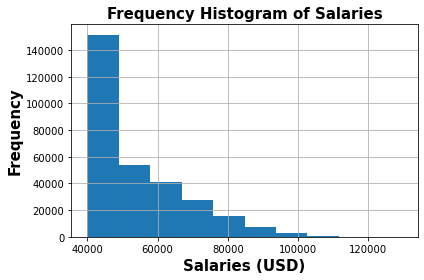

In [19]:
# used matplotlib to create histogram of salaries
from matplotlib import pyplot as plt
#1. Create a histogram to visualize the most common salary ranges for employees.

# Creating dataset
#salaries_df
salaries = salaries_df['salary']
#salaries = df_emp_title_salary['salary']
  
# Creating histogram
fig, ax = plt.subplots(1, 1)
ax.hist(salaries)
  
# Set title
ax.set_title("Frequency Histogram of Salaries",fontsize=15, fontweight='bold')

# adding labels
ax.set_xlabel('Salaries (USD)',fontsize=15, fontweight='bold')
ax.set_ylabel('Frequency',fontsize=15, fontweight='bold')
ax.grid(True) 

plt.tight_layout()

#Save and show plot
#plt.savefig(output_folder + "1_FreqHistogramOfSalaries.png",facecolor = 'white')
plt.show()

In [16]:
#2. Create a bar chart of average salary by title.
df_emp_title_salary.head()

,emp_no,title,salary
0,473302,Staff,40000
1,421786,Staff,40000
2,273487,Staff,56087
3,246449,Staff,87084
4,48085,Staff,63016


In [17]:
# get the titles with the mean. sorted descending salary mean
dfg_salary_by_title = df_emp_title_salary.groupby('title')['salary'].mean().round(2).sort_values(ascending=False)
dfg_salary_by_title.head()

title
Senior Staff          58550.17
Staff                 58465.38
Manager               51531.04
Technique Leader      48582.90
Assistant Engineer    48564.43
Name: salary, dtype: float64

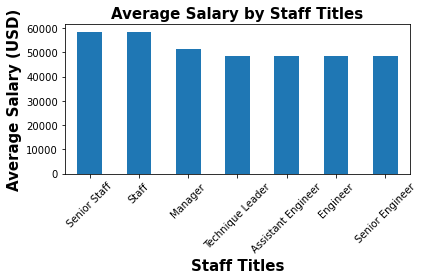

In [18]:
# Used a Pandas bar chart
#2. Create a bar chart of average salary by title.

plt = dfg_salary_by_title.plot(kind="bar", figsize=(6,4))
xindex = dfg_salary_by_title.index
# Pandas can be used to set the tick labels as well
plt.set_xticklabels(xindex, rotation=45)
plt.set_ylabel('Average Salary (USD)', fontsize=15, fontweight='bold')
plt.set_xlabel('Staff Titles', fontsize=15, fontweight='bold')
plots = plt.set_title('Average Salary by Staff Titles', fontsize=15, fontweight='bold')

#Save and show plot
fig = plt.get_figure()
fig.tight_layout()
fig.savefig(output_folder + "2_AverageSalaryByStaffTitles.png",facecolor = 'white')
